# Supervised Learning Project (Classification & Regression)

In [1]:
# Import the module
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier


## Classification

In [2]:
df = pd.read_csv('telecom_churn_clean.csv')
df


,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [3]:
churn_df = df.drop(columns='Unnamed: 0')
churn_df


,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [4]:
# Create arrays for the features and the target variable
y = churn_df['churn'].values
X = churn_df[['account_length','customer_service_calls']].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [5]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])


In [6]:
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 


Predictions: [0 1 0]


In [7]:
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.8740629685157422


In [8]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    
    print(neighbors, '\n', train_accuracies, '\n', test_accuracies)
                               

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0} 
 {1: 0.7946026986506747}
[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9036009002250562} 
 {1: 0.7946026986506747, 2: 0.8605697151424287}
[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9036009002250562, 3: 0.9114778694673669} 
 {1: 0.7946026986506747, 2: 0.8605697151424287, 3: 0.8500749625187406}
[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9036009002250562, 3: 0.9114778694673669, 4: 0.8945986496624156} 
 {1: 0.7946026986506747, 2: 0.8605697151424287, 3: 0.8500749625187406, 4: 0.8695652173913043}
[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9036009002250562, 3: 0.9114778694673669, 4: 0.8945986496624156, 5: 0.8953488372093024} 
 {1: 0.7946026986506747, 2: 0.8605697151424287, 3: 0.8500749625187406, 4: 0.8695652173913043, 5: 0.8740629685157422}
[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9036009002250562, 3: 0.9114778694673669, 4: 0.8945986496624156, 5: 0.8953488372093024, 6: 0.8893473368342085} 


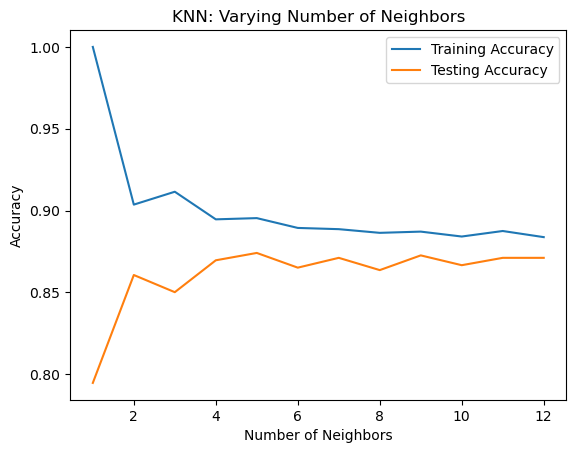

In [9]:
# Add a title
plt.title('KNN: Varying Number of Neighbors')

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()

plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()


## Regression

In [10]:
sales_df = pd.read_excel('sales.xlsx')
sales_df


,tv,radio,social_media,influencer,sales
0,16000,6566.23,2907.98,Mega,54732.76
1,13000,9237.76,2409.57,Mega,46677.90
2,41000,15886.45,2913.41,Mega,150177.83
3,83000,30020.03,6922.30,Mega,298246.34
4,15000,8437.41,1406.00,Micro,56594.18
...,...,...,...,...,...
4541,26000,4472.36,717.09,Micro,94685.87
4542,71000,20610.69,6545.57,Nano,249101.92
4543,44000,19800.07,5096.19,Micro,163631.46
4544,71000,17534.64,1940.87,Macro,253610.41


In [11]:
# Create X from the radio column's values
X = sales_df['radio'].values 

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1,1)

# Check the shape of the features and targets
print(X.shape,y.shape)


(4546, 1) (4546,)


In [12]:
# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])


[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


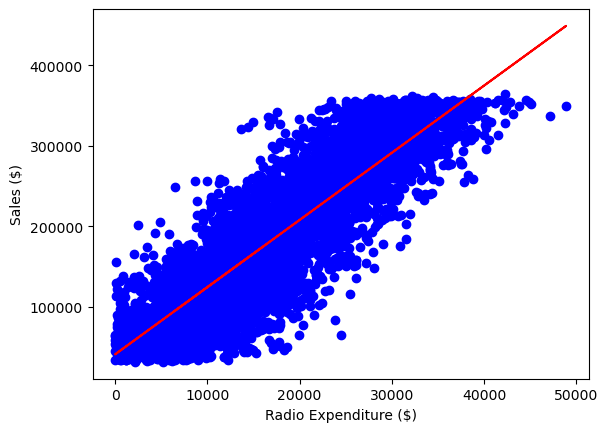

In [13]:
# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()


In [14]:
sales = pd.read_excel('sales.xlsx')
sales


,tv,radio,social_media,influencer,sales
0,16000,6566.23,2907.98,Mega,54732.76
1,13000,9237.76,2409.57,Mega,46677.90
2,41000,15886.45,2913.41,Mega,150177.83
3,83000,30020.03,6922.30,Mega,298246.34
4,15000,8437.41,1406.00,Micro,56594.18
...,...,...,...,...,...
4541,26000,4472.36,717.09,Micro,94685.87
4542,71000,20610.69,6545.57,Nano,249101.92
4543,44000,19800.07,5096.19,Micro,163631.46
4544,71000,17534.64,1940.87,Macro,253610.41


In [15]:
sales = pd.get_dummies(sales,columns=['influencer'],drop_first=True)
sales


,tv,radio,social_media,sales,influencer_Mega,influencer_Micro,influencer_Nano
0,16000,6566.23,2907.98,54732.76,1,0,0
1,13000,9237.76,2409.57,46677.90,1,0,0
2,41000,15886.45,2913.41,150177.83,1,0,0
3,83000,30020.03,6922.30,298246.34,1,0,0
4,15000,8437.41,1406.00,56594.18,0,1,0
...,...,...,...,...,...,...,...
4541,26000,4472.36,717.09,94685.87,0,1,0
4542,71000,20610.69,6545.57,249101.92,0,0,1
4543,44000,19800.07,5096.19,163631.46,0,1,0
4544,71000,17534.64,1940.87,253610.41,0,0,0


In [16]:
# Create X and y arrays
X = sales.drop("sales", axis=1).values
y = sales["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))


Predictions: [53135.43066453 71060.6004603 ], Actual Values: [55261.28 67574.9 ]


In [17]:
# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))


R^2: 0.9990150033349248
RMSE: 2944.7428499310486


In [18]:
# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
cv_scores


array([0.99893896, 0.99909078, 0.99900929, 0.99896318, 0.99889195,
       0.99903855])

In [19]:
# Print the mean
np.mean(cv_scores)


0.9989887858587477

In [20]:
# Print the standard deviation
np.std(cv_scores)


6.559306063467905e-05

In [21]:
# Print the 95% confidence interval
np.quantile(cv_scores, [0.025, 0.975])


array([0.99889783, 0.99908425])

In [22]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train,y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test,y_test)
  ridge_scores.append(score)
print(ridge_scores)


[0.9990150033784768, 0.9990150037697175, 0.9990150076129891, 0.9990150407484745, 0.9990151623295044, 0.999015208384041]


In [23]:
sales_lass = pd.read_excel('sales.xlsx', usecols=['tv','radio','social_media','sales'])
sales_lass


,tv,radio,social_media,sales
0,16000,6566.23,2907.98,54732.76
1,13000,9237.76,2409.57,46677.90
2,41000,15886.45,2913.41,150177.83
3,83000,30020.03,6922.30,298246.34
4,15000,8437.41,1406.00,56594.18
...,...,...,...,...
4541,26000,4472.36,717.09,94685.87
4542,71000,20610.69,6545.57,249101.92
4543,44000,19800.07,5096.19,163631.46
4544,71000,17534.64,1940.87,253610.41


In [24]:
X = sales_lass.drop("sales", axis=1).values
y = sales_lass["sales"].values
names = sales_lass.drop("sales", axis=1).columns

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)


[ 3.56256962 -0.00397035  0.00496385]


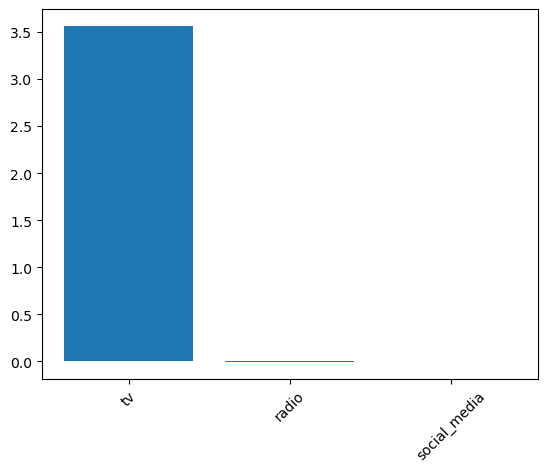

In [25]:
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()


## Fine-Tuning The Model

In [26]:
diabetes_df = pd.read_csv('diabetes_clean.csv')
diabetes_df


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
# Create X and y arrays
X = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df["diabetes"].values


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
random_state=42)


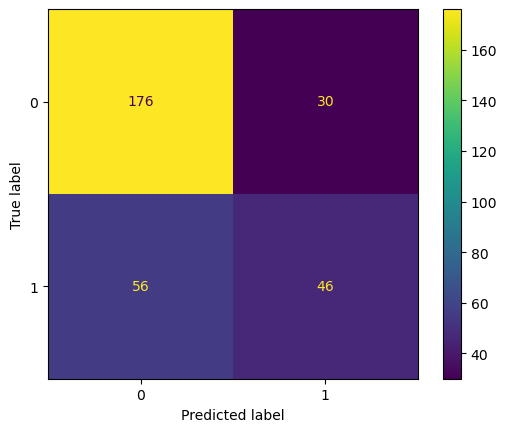

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



In [29]:
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Generate the confusion matrix and classification report
print(classification_report(y_test, y_pred))


In [30]:
# Instantiate the model
logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])


[0.30589053 0.19713126 0.14054625 0.16425223 0.51438897 0.49610194
 0.01674232 0.60366241 0.54653565 0.79391879]


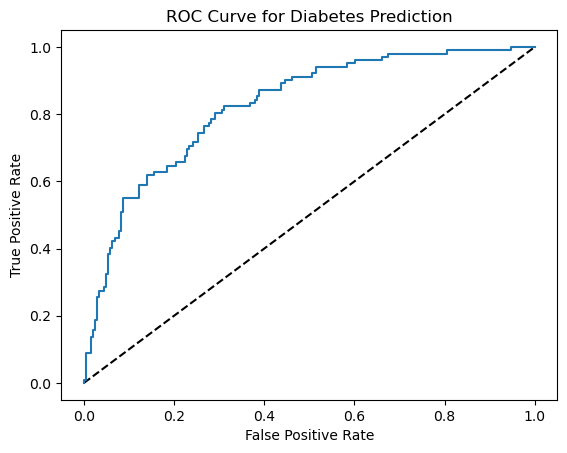

In [31]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()


0.8242908814011042


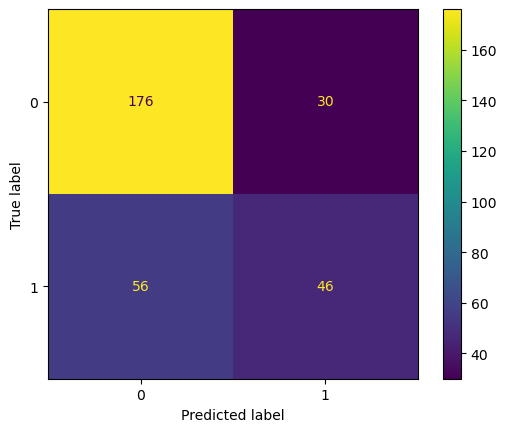

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



In [32]:
# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Calculate the classification report
print(classification_report(y_test, y_pred))


In [33]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1,20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train,y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))


Tuned lasso paramaters: {'alpha': 0.15790315789473686}
Tuned lasso score: 0.2725016000809049


In [34]:
# # Create the parameter space
# params = {"penalty": ["l1", "l2"],
#          "tol": np.linspace(0.0001, 1.0, 50),
#          "C": np.linspace(0.1, 1.0, 50),
#          "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# # Instantiate the RandomizedSearchCV object
# logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# # Fit the data to the model
# logreg_cv.fit(X_train, y_train)

# # Print the tuned parameters and score
# print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
# print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))


## Preprocessing and Pipelines

In [35]:
music_df = pd.read_csv('music_clean.csv')
music_df


,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.1770,0.000002,0.1160,-14.824,0.0353,92.934,0.6180,1
1,37591,63.0,0.003840,0.635,190448.0,0.9080,0.083400,0.2390,-4.795,0.0563,110.012,0.6370,1
2,37658,59.0,0.000075,0.352,456320.0,0.9560,0.020300,0.1250,-3.634,0.1490,122.897,0.2280,1
3,36060,54.0,0.945000,0.488,352280.0,0.3260,0.015700,0.1190,-12.020,0.0328,106.063,0.3230,1
4,35710,55.0,0.245000,0.667,273693.0,0.6470,0.000297,0.0633,-7.787,0.0487,143.995,0.3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44501,57.0,0.972000,0.193,208040.0,0.0329,0.929000,0.0978,-28.228,0.0460,82.165,0.0366,0
996,25114,56.0,0.005790,0.939,144453.0,0.3730,0.000000,0.2740,-7.779,0.2270,119.953,0.0602,0
997,46896,54.0,0.016100,0.739,238339.0,0.5390,0.000000,0.2350,-9.735,0.3370,85.082,0.8350,0
998,45135,62.0,0.326000,0.515,286707.0,0.5050,0.000000,0.1020,-5.606,0.0294,150.063,0.5380,0


In [36]:
music_df = music_df.drop(columns='Unnamed: 0')
music_df


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60.0,0.896000,0.726,214547.0,0.1770,0.000002,0.1160,-14.824,0.0353,92.934,0.6180,1
1,63.0,0.003840,0.635,190448.0,0.9080,0.083400,0.2390,-4.795,0.0563,110.012,0.6370,1
2,59.0,0.000075,0.352,456320.0,0.9560,0.020300,0.1250,-3.634,0.1490,122.897,0.2280,1
3,54.0,0.945000,0.488,352280.0,0.3260,0.015700,0.1190,-12.020,0.0328,106.063,0.3230,1
4,55.0,0.245000,0.667,273693.0,0.6470,0.000297,0.0633,-7.787,0.0487,143.995,0.3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,57.0,0.972000,0.193,208040.0,0.0329,0.929000,0.0978,-28.228,0.0460,82.165,0.0366,0
996,56.0,0.005790,0.939,144453.0,0.3730,0.000000,0.2740,-7.779,0.2270,119.953,0.0602,0
997,54.0,0.016100,0.739,238339.0,0.5390,0.000000,0.2350,-9.735,0.3370,85.082,0.8350,0
998,62.0,0.326000,0.515,286707.0,0.5050,0.000000,0.1020,-5.606,0.0294,150.063,0.5380,0


In [37]:
# Create music_dummies
music_df = pd.get_dummies(music_df, drop_first=True)
music_df


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60.0,0.896000,0.726,214547.0,0.1770,0.000002,0.1160,-14.824,0.0353,92.934,0.6180,1
1,63.0,0.003840,0.635,190448.0,0.9080,0.083400,0.2390,-4.795,0.0563,110.012,0.6370,1
2,59.0,0.000075,0.352,456320.0,0.9560,0.020300,0.1250,-3.634,0.1490,122.897,0.2280,1
3,54.0,0.945000,0.488,352280.0,0.3260,0.015700,0.1190,-12.020,0.0328,106.063,0.3230,1
4,55.0,0.245000,0.667,273693.0,0.6470,0.000297,0.0633,-7.787,0.0487,143.995,0.3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,57.0,0.972000,0.193,208040.0,0.0329,0.929000,0.0978,-28.228,0.0460,82.165,0.0366,0
996,56.0,0.005790,0.939,144453.0,0.3730,0.000000,0.2740,-7.779,0.2270,119.953,0.0602,0
997,54.0,0.016100,0.739,238339.0,0.5390,0.000000,0.2350,-9.735,0.3370,85.082,0.8350,0
998,62.0,0.326000,0.515,286707.0,0.5050,0.000000,0.1020,-5.606,0.0294,150.063,0.5380,0


In [38]:
# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_df.shape))


Shape of music_dummies: (1000, 12)


In [39]:
# Create X and y
X = music_df.drop("popularity", axis=1).values
y = music_df["popularity"].values

# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))


Average RMSE: 10.334930115405795
Standard Deviation of the target array: 14.02156909907019


In [40]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())


popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


In [41]:
# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])
music_df


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60.0,0.896000,0.726,214547.0,0.1770,0.000002,0.1160,-14.824,0.0353,92.934,0.6180,1
1,63.0,0.003840,0.635,190448.0,0.9080,0.083400,0.2390,-4.795,0.0563,110.012,0.6370,1
2,59.0,0.000075,0.352,456320.0,0.9560,0.020300,0.1250,-3.634,0.1490,122.897,0.2280,1
3,54.0,0.945000,0.488,352280.0,0.3260,0.015700,0.1190,-12.020,0.0328,106.063,0.3230,1
4,55.0,0.245000,0.667,273693.0,0.6470,0.000297,0.0633,-7.787,0.0487,143.995,0.3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,57.0,0.972000,0.193,208040.0,0.0329,0.929000,0.0978,-28.228,0.0460,82.165,0.0366,0
996,56.0,0.005790,0.939,144453.0,0.3730,0.000000,0.2740,-7.779,0.2270,119.953,0.0602,0
997,54.0,0.016100,0.739,238339.0,0.5390,0.000000,0.2350,-9.735,0.3370,85.082,0.8350,0
998,62.0,0.326000,0.515,286707.0,0.5050,0.000000,0.1020,-5.606,0.0294,150.063,0.5380,0


In [42]:
# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))


popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Shape of the `music_df`: (1000, 12)


In [43]:
# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]


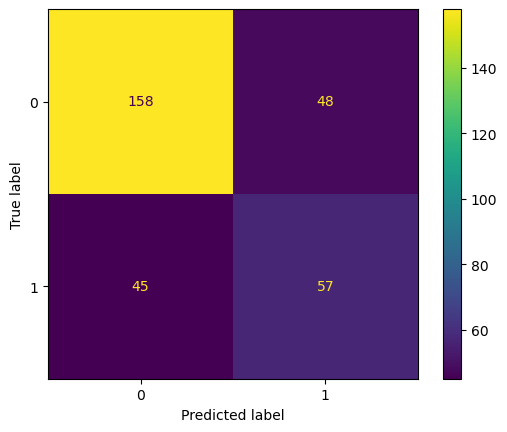

In [44]:
# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [45]:
# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))


-0.003982615748962637


In [46]:
# # Build the steps
# steps = [("scaler", StandardScaler()),
#          ("logreg", LogisticRegression())]
# pipeline = Pipeline(steps)

# # Create the parameter space
# parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
#                                                     random_state=21)

# # Instantiate the grid search object
# cv = GridSearchCV(pipeline, param_grid=parameters)

# # Fit to the training data
# cv.fit(X_train, y_train)
# print(cv.best_score_, "\n", cv.best_params_)


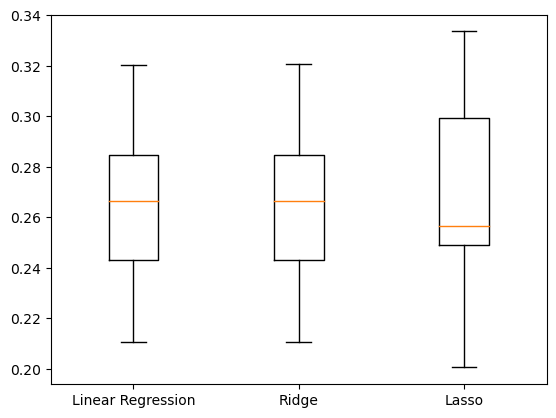

In [47]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)
  
# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()


In [48]:
for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))
    

Linear Regression Test Set RMSE: 0.4046681591988895
Ridge Test Set RMSE: 0.40467473285070693
Lasso Test Set RMSE: 0.4118686651344865


In [49]:
# # Create models dictionary
# models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
# results = []

# # Loop through the models' values
# for model in models.values():
  
#   # Instantiate a KFold object
#   kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
#   # Perform cross-validation
#   cv_results = cross_val_score(model, X_train, y_train, cv=kf)
#   results.append(cv_results)
# plt.boxplot(results, labels=models.keys())
# plt.show()


In [50]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))


Tuned Logistic Regression Parameters: {'logreg__C': 0.112, 'logreg__solver': 'newton-cg'}, Accuracy: 0.7532467532467533
